In [99]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import special
from scipy import integrate

D=0.01
rm=0.005
ka=1.
Dt = 2*D
Rt = 2*rm
tm = ((Rt)**2)/4./D
pi=math.pi
print 'D',D,'ka',ka,'rm',rm,'ka/D',ka/D

func = lambda u,t: (math.exp(-Dt*u*u*t)-1)/u/(
    ((ka*special.jv(0,Rt*u)+(2*pi*Rt*u*Dt*special.jv(1,Rt*u)))**2)+
 ((ka*special.yn(0,Rt*u)+(2*pi*Rt*u*Dt*special.yn(1,Rt*u)))**2))

def phix(x):
    return 1./( (377.*x/324)+(1+ (314.*(x**2)/847) )**0.5)

def kte(tt): # integration of exact solution.
    y,err = integrate.quad(func,0,np.inf,args=tt)
    #print err
    return y*8*ka*ka*Dt/pi + ka

def kt2(t): #all range approx
    p1 = 0.0791183
    p2 = 0.935916
    p3 = 2.62231
    p4 = 12.9791
    p5 = 8.70808
    E = math.sqrt(p4*Dt*ka*t/Rt/Rt/(ka+p5*Dt))
    denom = Dt + p1*ka*math.log(p2+(p3*Dt*t/Rt/Rt)+E)
    return ka*Dt/denom

def kt3(t):#johnson eq14, shorttime RBC
    A = ka/(2*pi*Dt)
    B = t/tm
    return 2*pi*Dt*(0.5-(A*math.sqrt(B/pi))-(A*0.5*B*math.sqrt(B/pi))+
                    (A*phix(A*math.sqrt(B))*(1-(pi*Dt/ka)+(A*B)+(0.5*A*A*B*B))))

factor = 1.1
tv = ((factor*Rt)**2)/4./D
tau = tm*((factor**2)-1)
#tau = tv-tm
print 'tau',tau,'tm',tm,'tv',tv
tt2 = np.logspace(-11,math.log10(tau),200)
#tt2 = np.linspace(1e-10,tau,1000)
ktes = [kte(t) for t in tt2]
print 'kt(0)',ktes[0]
avek = np.trapz(ktes,tt2)/tau#(tt2[-1]-tt2[0])
print 'average kt until tau',avek,avek*ka


D 0.01 ka 1.0 rm 0.005 ka/D 100.0
tau 0.000525 tm 0.0025 tv 0.003025
kt(0) 1.00000013471
average kt until tau 0.344414059693 0.344414059693


In [127]:
8*math.pi*D/math.log(1./(32*math.pi*rm*rm))

0.0419846841309627

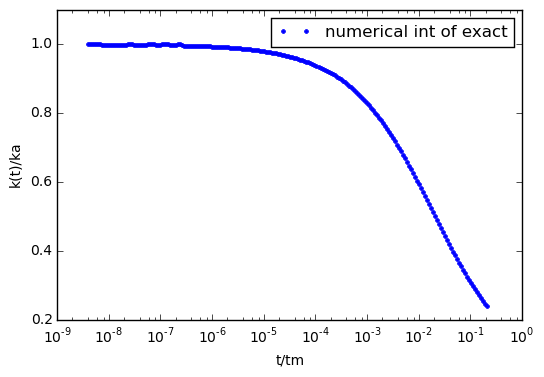

In [108]:
#tt1 = np.logspace(-8,-3,50)
plt.plot(tt2/tm,ktes,'.',label='numerical int of exact')
#plt.plot(tt2/tm,[kt2(t)/ka for t in tt2],'o',label='crude')
#plt.plot(tt1/tm,[kt3(t)/ka for t in tt1],'.',label='shorttime')
plt.xscale('log')
plt.xlabel('t/tm')
plt.ylabel('k(t)/ka')
plt.legend()


0.999830120219


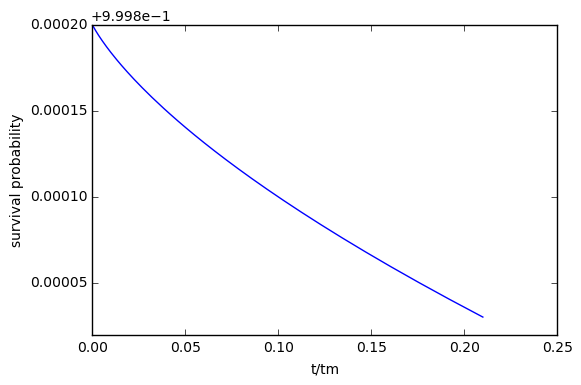

In [116]:
SP = [np.exp(-np.trapz(ktes[0:i],tt2[0:i])) for i in range(len(ktes))][1:]
print SP[-1]
plt.plot(tt2[1:]/tm,SP)
#plt.xscale('log')
##plt.yscale('log')
#plt.ylim(0.9988,1.+1e-4)
plt.xlabel('t/tm')
plt.ylabel('survival probability')
plt.legend()

0.999830120219


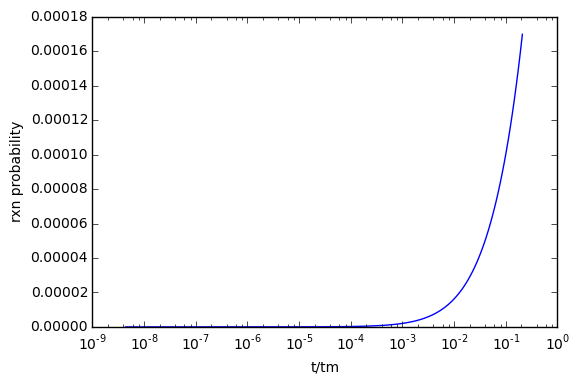

In [121]:
print SP[-1]
rxp = [1-sp for sp in SP]
plt.plot(tt2[1:]/tm,rxp)
plt.xscale('log')
##plt.yscale('log')
#plt.ylim(0.9988,1.+1e-4)
plt.xlabel('t/tm')
plt.ylabel('rxn probability')
plt.legend()

0.998538448519


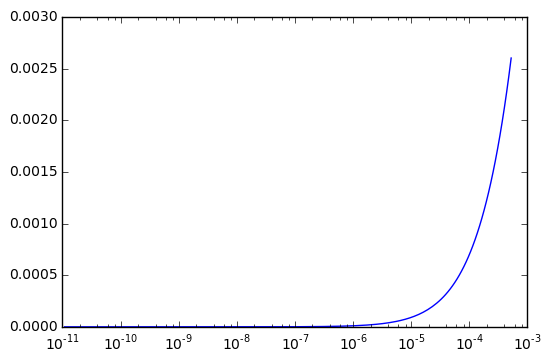

In [125]:
rxpsum = np.cumsum(rxp)
plt.plot(tt2[1:],rxpsum)
plt.xscale('log')
print 1-np.trapz(rxpsum,tt2[1:])/tau

In [60]:
0.0036-0.0025

0.0010999999999999998

In [61]:
import matplotlib.pylab as plt
plot = plt.loglog
plot(ks, numpy.array(params) / (240 / 9.0), 'o')
x = numpy.logspace(-2, +3, 101)
plot(x, x / (1.0 + 0.2 * x), '-')
plot(x, x, '--')
plt.show()

NameError: name 'ks' is not defined